# Modeling

The goal is to see whether fragrance notes are good predictors of fragrance ratings. In any case, use training data to draw inferences from the model.

- [x] Clustering on five-rated fragrances only
- [x] Logistic regression with and without PCA to classify 3- and 4-rated fragrances

#### Library imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN, KMeans, FeatureAgglomeration, AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import silhouette_score

# Decision tree modeling
# !pip install chefboost
from chefboost import Chefboost as chef

import pickle

# Hide deprecation/future warnings
import warnings; warnings.simplefilter('ignore')

from IPython.display import Markdown, display as ipd

pd.set_option('display.max_row', 200) # Set ipython's max row display
pd.set_option('display.max_columns', 85) # Set iPython's max column count
pd.set_option('display.max_colwidth', 1_000) # Set iPython's max column width

# pseudo-markdown in code cells
def printmd(string):
    ipd(Markdown(string))
# ref: https://discuss.analyticsvidhya.com/t/how-to-make-a-text-bold-within-print-statement-in-ipython-notebook/14552/2

#### Read in data

In [8]:
# Dataframe filtered on just five ratings with dummified top notes only

fives = pd.read_csv('../data/data_subsets/fives.csv')
ipd(fives.head(1))

# Dataframe with dummified top notes only

fragrance_df = pd.read_csv('../data/data_subsets/fragrance_df.csv')

# Dataframe with dummified top, middle and base notes 

fragrance_df_top_mid_base = pd.read_csv('../data/data_subsets/fragrance_df_top_mid_base.csv')

ipd(fragrance_df.head(1))
ipd(fragrance_df_top_mid_base.head(1))

,url,title,average_rating_,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,bbq,beeswax,bitter,cacao,camphor,caramel,caramela,cherry,cinnamon,citrus,clay,coca-cola,coconut,coffee,cognac,conifer,earthy,floral,foresty,fresh,fresh_spicy,fruity,gourmand,green,herbal,honey,industrial_glue,lactonic,...,top_3_wild_strawberry_leaf,top_3_wild_berries,top_3_wildflowers,top_3_wisteria,top_3_wolfberry,top_3_wood_resin,top_3_woodsy_notes,top_3_woody_notes,top_3_wool,top_3_wormwood,top_3_yellow_freesia,top_3_yellow_mandarin,top_3_yellow_narcissus,top_3_yellow_plum,top_3_ylang-ylang,top_3_yuzu,top_3_black_fig,top_3_boxwood,top_3_cannabis,top_3_cream_soda,top_3_dark_woodsy_notes,top_3_elemi,top_3_gunpowder,top_3_hassaku,top_3_heather,top_3_iris,top_3_jackfruit,top_3_juniper_berry,top_3_litsea_cubeba,top_3_mulberry,top_3_oak_moss,top_3_plum.1,top_3_resins,top_3_sake,top_3_spun_sugar,top_3_sycamore,top_3_tincture_of_rose,top_3_vanilla_bean,top_3_vetyver,top_3_violet_leaves,top_3_watercress,top_3_white_honey
0,https://www.fragrantica.com/perfume/The-Spirit-of-Dubai/Aamal-44152.html,Aamal The Spirit of Dubai for women and men,5.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,url,title,average_rating_,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,bbq,beeswax,bitter,cacao,camphor,caramel,caramela,cherry,cinnamon,citrus,clay,coca-cola,coconut,coffee,cognac,conifer,earthy,floral,foresty,fresh,fresh_spicy,fruity,gourmand,green,herbal,honey,industrial_glue,lactonic,...,top_3_wild_strawberry_leaf,top_3_wild_berries,top_3_wildflowers,top_3_wisteria,top_3_wolfberry,top_3_wood_resin,top_3_woodsy_notes,top_3_woody_notes,top_3_wool,top_3_wormwood,top_3_yellow_freesia,top_3_yellow_mandarin,top_3_yellow_narcissus,top_3_yellow_plum,top_3_ylang-ylang,top_3_yuzu,top_3_black_fig,top_3_boxwood,top_3_cannabis,top_3_cream_soda,top_3_dark_woodsy_notes,top_3_elemi,top_3_gunpowder,top_3_hassaku,top_3_heather,top_3_iris,top_3_jackfruit,top_3_juniper_berry,top_3_litsea_cubeba,top_3_mulberry,top_3_oak_moss,top_3_plum.1,top_3_resins,top_3_sake,top_3_spun_sugar,top_3_sycamore,top_3_tincture_of_rose,top_3_vanilla_bean,top_3_vetyver,top_3_violet_leaves,top_3_watercress,top_3_white_honey
0,https://www.fragrantica.com/perfume/The-Spirit-of-Dubai/Aamal-44152.html,Aamal The Spirit of Dubai for women and men,5.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,url,title,average_rating_,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,bbq,beeswax,bitter,cacao,camphor,caramel,caramela,cherry,cinnamon,citrus,clay,coca-cola,coconut,coffee,cognac,conifer,earthy,floral,foresty,fresh,fresh_spicy,fruity,gourmand,green,herbal,honey,industrial_glue,lactonic,...,base_1_oriental_notes,base_1_patchouli,base_1_pine,base_1_powdery_notes,base_1_praline,base_1_raspberry,base_1_red_cedar,base_1_resin,base_1_rose,base_1_saffron,base_1_sandalwood,base_1_siam_benzoin,base_1_spices,base_1_spicy_notes,base_1_styrax,base_1_sugar,base_1_sumac,base_1_sweet_notes,base_1_tahitian_vanilla,base_1_tobacco,base_1_toffee,base_1_tonka_bean,base_1_tuberose,base_1_turkish_rose,base_1_vanila,base_1_vanilla,base_1_vanille,base_1_vetiver,base_1_virginia_cedar,base_1_virginian_cedar,base_1_watery_notes,base_1_whipped_cream,base_1_white_chocolate,base_1_white_musk,base_1_white_woods,base_1_white_tobacco,base_1_wild_berries,base_1_woodsy_notes,base_1_woody_notes,base_1_oak_moss,base_1_vetyver,base_1_white_honey
0,https://www.fragrantica.com/perfume/The-Spirit-of-Dubai/Aamal-44152.html,Aamal The Spirit of Dubai for women and men,5.0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [529]:
fragrance_df_top_mid_base.shape

(42051, 6753)

In [6]:
# Set list of the names of notes

notes_names = ['alcohol', 'aldehydic', 'almond', 'amber', 'animalic', 'anis', 'aquatic',
               'aromatic', 'asphault', 'bacon', 'balsamic', 'bbq', 'beeswax',
               'bitter', 'cacao', 'camphor', 'caramel', 'caramela', 'cherry',
               'cinnamon', 'citrus', 'clay', 'coca-cola', 'coconut', 'coffee',
               'cognac', 'conifer', 'earthy', 'floral', 'foresty', 'fresh',
               'fresh spicy', 'fruity', 'gourmand', 'green', 'herbal', 'honey',
               'industrial glue', 'lactonic', 'leather', 'marine', 'martini',
               'metallic', 'milky', 'mossy', 'musky', 'narcotic', 'nutty', 'oud',
               'ozonic', 'patchouli', 'plastic', 'powdery', 'rose', 'rum',
               'salty', 'sand', 'savory', 'smoky', 'soapy', 'soft spicy', 'sour',
               'sweet', 'tennis ball', 'terpenic', 'tobacco', 'tonka (coumarin)',
               'tropical', 'tuberose', 'unknown', 'vanilla', 'vinyl', 'violet',
               'vodka', 'warm spicy', 'watery', 'wet plaster', 'whiskey',
               'white floral', 'white wine', 'wine', 'woody', 'yellow floral']

# Set columns sets for each category of top, middle and base

top_cols = ['top_0', 'top_1', 'top_2', 'top_3']

middle_cols = ['middle_0', 'middle_0_1', 'middle_1', 'middle_0_2', 'middle_1_1', 'middle_2']

base_cols = ['base_0', 'base_0_1', 'base_1']

top_middle_base_cols = top_cols + middle_cols + base_cols

notes_generic_and_specific = notes_names + top_cols

printmd(f'**Size of `notes_generic_and_specific`: {len(notes_generic_and_specific):,}**')

**Size of `notes_generic_and_specific`: 87**

In [9]:
'''
Drop (undumified) middle and base columns from the original dataset - irrelevant here because this dataframe is 
for top notes only
'''
fragrance_df.drop(columns = middle_cols, inplace = True)

fragrance_df.drop(columns = ['base_0', 'base_0_1', 'base_1'], inplace = True)

fragrance_df.shape

(2594, 3720)

### Set the feature matrix (we're focusing on five-rated fragrances to start with)

In [4]:
notes_generic_and_specific_fives = [col for col in notes_generic_and_specific if col in fives.columns]

X = fives[notes_generic_and_specific_fives]

### Scale the data for distance-based models

In [5]:
# Instantiate the scaler

ss = StandardScaler()

# Fit-transform to features
X_sc = ss.fit_transform(X)

# Modeling for inference

## Unsupervised models

### DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.2, min_samples = 10)

dbscan.fit(X_sc)

set(dbscan.labels_)

In [44]:
silhouette_score(X_sc, dbscan.labels_)

-0.30291996083089157

In [52]:
fives['db_cluster'] = dbscan.labels_
fives['db_cluster'].value_counts()

-1    2716
 2      58
 3      23
 1      21
 0      11
Name: db_cluster, dtype: int64

## $K$-Means

In [53]:
km = KMeans(n_clusters = 3)

km.fit(X_sc)

ipd(set(km.labels_))

fives['km_cluster'] = km.labels_

{0, 1, 2}

### Evaluate the $K$-Means model

In [10]:
printmd(f"**This KMeans model's silhouette score of {round(silhouette_score(X_sc, km.labels_), 3)} is just ok (hovering just below zero).**")

### About the silhouette score

The silhouette score is the average of each point's cohesion and separation score. 

Cohesion: Average distance of points within clusters

Separation: Average distance of points in one cluster to points in other clusters

Bad: -1 

OK: 0

Good:  1

In [56]:
fives.groupby('km_cluster').mean()[notes_generic_and_specific_fives]

,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,...,top_3_resins,top_3_sake,top_3_spun_sugar,top_3_sycamore,top_3_tincture_of_rose,top_3_vanilla_bean,top_3_vetyver,top_3_violet_leaves,top_3_watercress,top_3_white_honey
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.125000,0.000000,0.0,0.062500,0.062500,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000356,0.012802,0.013869,0.173542,0.082859,0.0,0.029516,0.273471,0.0,0.0,...,0.0,0.0,0.0,0.000356,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
km_centroids = pd.DataFrame(ss.inverse_transform(km.cluster_centers_), 
                            columns = notes_generic_and_specific_fives)
km_centroids

,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,...,top_3_resins,top_3_sake,top_3_spun_sugar,top_3_sycamore,top_3_tincture_of_rose,top_3_vanilla_bean,top_3_vetyver,top_3_violet_leaves,top_3_watercress,top_3_white_honey
0,-5.421011e-20,-1.734723e-18,0.000000,0.125000,1.387779e-17,0.0,0.062500,0.062500,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.387779e-17,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,3.556188e-04,1.280228e-02,0.013869,0.173542,8.285917e-02,0.0,0.029516,0.273471,0.0,0.0,...,0.0,0.0,0.0,0.000356,0.0,0.0,0.0,0.0,0.0,0.0


## Feature agglomeration

In [90]:
ipd(X.shape)
agglo = FeatureAgglomeration(n_clusters = 7)
agglo.fit(X)
X_reduced = agglo.transform(X)
X_reduced.shape

(2829, 3706)

(2829, 7)

In [93]:
fives[notes_generic_and_specific_fives].shape

(2829, 3706)

In [97]:
printmd('**`X_reduced` is the feature agglomerated 7-column feature set (from the original 3,706 columns).**')

printmd("**Here's the first set of agglomerated values and the cluster to which they belong.**")

list(zip(X_reduced, agglo.labels_))[0]
    
# ref: https://stackoverflow.com/questions/51544794/python-featureagglomeration-results

**`X_reduced` is the feature agglomerated 7-column feature set (from the original 3,706 columns).**

**Here's the first set of agglomerated values and the cluster to which they belong.**

(array([0.        , 0.        , 0.        , 0.00162646, 0.5       ,
        0.        , 1.        ]),
 3)

## Agglomerative clustering


Text(0.5, 1.0, 'Dendrograms')

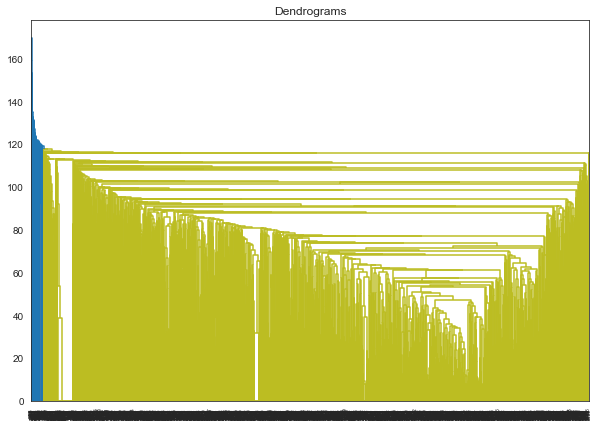

In [79]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  

dend = shc.dendrogram(shc.linkage(X_sc, method='ward'))

plt.title("Dendrograms")  

# ref: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

### Visualize the hierarchical clustering as a dendrogram

Text(0.5, 1.0, 'Dendrograms')

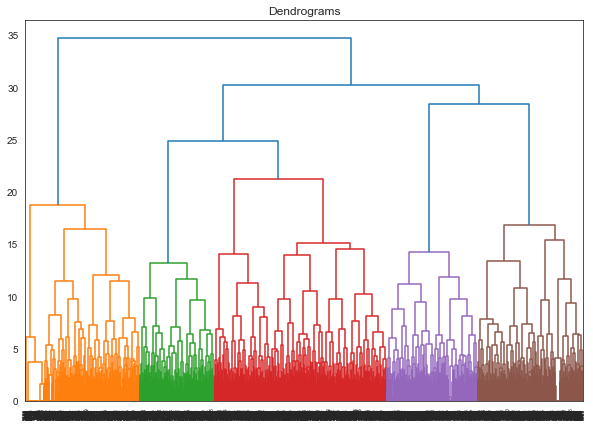

In [80]:
# Plot a dendrogram
plt.figure(figsize=(10, 7))  

dend = shc.dendrogram(shc.linkage(X_reduced, method='ward'))

plt.title("Dendrograms")  

plt.savefig('../figures/dendrogram.png')

# ref: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

#### We'll set `n_clusters` to seven since the dendrogram has seven lines.

In [11]:
agglo_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  

fives['agglo_cluster'] = cluster.fit_predict(X_reduced)

### Note: I moved on to supervised models before I had time to dig further into the clustering results. I definitely want to do that as a next step.

## Supervised models

#### Check out class balance of target variable, `ratings_bins`

In [12]:
printmd("**The classes of `ratings_bins` are unbalanced. Let's keep only bins 3 and 4 for this task.**")
fragrance_df['ratings_bins'].value_counts(normalize = True)

**The classes of `ratings_bins` are unbalanced. Let's keep only bins 3 and 4 for this task.**

4    0.481881
3    0.399769
5    0.057055
2    0.043562
1    0.017733
Name: ratings_bins, dtype: float64

### For classification purposes, let's create a new dataframe with only 3 and 4 ratings

In [14]:
# Create a new dataframe with only 3 and 4 ratings

fragrance_df_3_4_rating = fragrance_df[fragrance_df['ratings_bins'].isin(['3', '4'])]

printmd("**The classes of `ratings_bins` in the new dataframe are reasonably balanced.**")

ipd(fragrance_df_3_4_rating['ratings_bins'].value_counts(normalize = True))

# ref: https://stackoverflow.com/questions/53082014/filter-dataframe-matching-column-values-with-list-values-in-python

**The classes of `ratings_bins` in the new dataframe are reasonably balanced.**

4    0.546568
3    0.453432
Name: ratings_bins, dtype: float64

In [16]:
# Export the data filtered on 3 and 4 ratings

fragrance_df_3_4_rating.to_csv('../data/data_subsets/fragrance_df_top_mid_base_3_4_rating.csv', index = False)

In [17]:
# Set feature matrix (including top, middle and base notes) and target variable for 3 and 4 ratings fragrances

X = fragrance_df_3_4_rating.drop(columns = ['url', 'title', 'average_rating_', 'ratings_bins'])
y = fragrance_df_3_4_rating['ratings_bins']


# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    stratify = y,       # equal balance of 3 and 4 in train and test
                                                    random_state = 42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape, '\n')
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1532, 3716)
y_train shape: (1532,) 

X_test shape: (755, 3716)
y_test shape: (755,)


#### Let's save the feature names from $X$ to a pickle file, so we can create predictions in a demo later

In [19]:
X_cols = list(X.columns)

# Write the list to pickle file

with open('../data/data_subsets/X_cols.pkl', 'wb') as pickle_out:
    pickle.dump(X_cols, pickle_out)
    
# Open the pickled list

with open('../data/data_subsets/X_cols.pkl', 'rb') as pickle_in:
    X_cols_from_pkl = pickle.load(pickle_in)
    
# Check that pickled list is of same length as Xa    
len(X_cols_from_pkl) == X.shape[1]

True

#### Scale the data

In [21]:
# Instantiate the scaler

ss = StandardScaler()

# Scale the X variables (with top notes only)

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Logistic Regression modeling

In [22]:
# Instantiate the model

logreg = LogisticRegression()

# Fit the model to train data

logreg.fit(X_train_sc, y_train)

# Get accuracy scores for train and test data

printmd(f'**Accuracy score on train data: {logreg.score(X_train_sc, y_train):.3f}**')

printmd(f'**Accuracy score on test data: {logreg.score(X_test_sc, y_test):.3f}**')

**Accuracy score on train data: 0.914**

**Accuracy score on test data: 0.523**

#### Severe overfitting on the data tells us the sheer volume of features is a handicap.

As a next step, as I mentioned in the `notes_preprocess_eda` notebook, I'd like to group notes by scent family to get a better read on their correlation to ratings. This would reduce dimensions and I'd like to see if that would improve model performance.

## Modeling with PCA and logistic regression + GridSearch with cross validation

In [45]:
pipe_logreg_pca = Pipeline([
                    # Step 1: Scale data
                    ('ss', StandardScaler()),
                    # Step 2: Decompose data into PCs
                    ('pc', PCA()),
                    # Step 3: Perform logistic regression
                    ('model', LogisticRegression())    # Principal Component Classification
])

params_logreg_pca = {
    'pc__n_components': range(10, 100, 10)
    }

gs_logreg_pca = GridSearchCV(pipe_logreg_pca, 
                  param_grid = params_logreg_pca)

gs_logreg_pca.fit(X_train_sc, y_train)

printmd(f'**Best parameters: {gs_logreg_pca.best_params_}**')
printmd(f'**Best cross-validation score: {gs_logreg_pca.best_score_}**')

**Best parameters: {'pc__n_components': 40}**

**Best cross-validation score: 0.5691916288773925**

In [51]:
printmd(f'**Train score: {gs_logreg_pca.score(X_train_sc, y_train)}**')

**Train score: 0.5966057441253264**

In [28]:
# Set up PCA correlations with features

pca_df = (pd.DataFrame(gs_logreg_pca.best_estimator_.named_steps['pc']
                        .components_,
                         columns = X_train.columns)
                        .iloc[:2, :])
    
pca_df.index = ['PC1', 'PC2']

printmd('**Preview of PCA correlations with features:**')
ipd(pca_df.T.head(2))

# ref: https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn

# Pull the explained variance attribute.
var_exp = gs_logreg_pca.best_estimator_.named_steps['pc'].explained_variance_ratio_
print(f'\nExplained variance (first 50 components): {var_exp[:51]}')

printmd('**There is no feature that strongly indicates predictive power.**')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance (first 50 components): {cum_var_exp[:51]}')

# ref: https://stackoverflow.com/questions/46800147/sklearn-how-to-retrieve-pca-components-and-explained-variance-from-inside-a-pi

**Preview of PCA correlations with features:**

,PC1,PC2
alcohol,-0.005898,-0.006108
aldehydic,-0.005903,0.003496



Explained variance (first 50 components): [0.00451561 0.00378903 0.00365272 0.0035927  0.00345085 0.00342685
 0.00342291 0.00334397 0.00322183 0.00316771 0.00300755 0.00297282
 0.00296245 0.00292195 0.00290166 0.00287372 0.00284332 0.00280625
 0.00278008 0.00274461 0.00272066 0.00270238 0.00264005 0.00261882
 0.00260864 0.00259208 0.00256147 0.00254774 0.00254204 0.00251834
 0.00251483 0.00250565 0.00249031 0.00247383 0.00246711 0.00244145
 0.0024281  0.00241829 0.00241199 0.00239364 0.00238549 0.00236474
 0.00234643 0.00234058 0.00232159 0.00230916 0.00228169 0.00227956
 0.0022665  0.00225172]


**There is no feature that strongly indicates predictive power.**

Cumulative explained variance (first 50 components): [0.00451561 0.00830464 0.01195736 0.01555006 0.01900091 0.02242776
 0.02585067 0.02919464 0.03241646 0.03558418 0.03859172 0.04156455
 0.044527   0.04744895 0.05035061 0.05322433 0.05606765 0.0588739
 0.06165398 0.0643986  0.06711926 0.06982164 0.07246169 0.07508051
 0.07768915 0.08028123 0.0828427  0.08539044 0.08793248 0.09045082
 0.09296565 0.0954713  0.09796162 0.10043545 0.10290256 0.10534401
 0.10777212 0.11019041 0.1126024  0.11499605 0.11738154 0.11974628
 0.12209271 0.12443328 0.12675487 0.12906403 0.13134571 0.13362528
 0.13589178 0.13814349]


In [52]:
# Get the top correlated PC1 components

printmd('**Top correlated PC1 components**')
top_pc1 = (pca_df.T.sort_values(by = 'PC1',
                                  ascending = False)
                      .iloc[3:30])           
pd.DataFrame(top_pc1['PC1']).head()

**Top correlated PC1 components**

,PC1
sour,0.092387
almond,0.090960
caramel,0.087380
tropical,0.080481
cherry,0.077584


Text(0, 0.5, 'PC2')

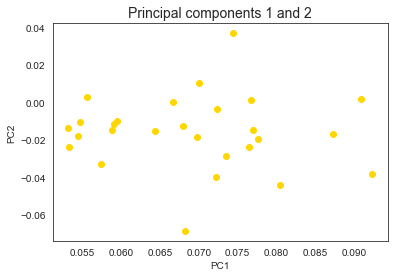

In [30]:
# Scatterplot of PC1 and PC2

plt.scatter(top_pc1['PC1'], top_pc1['PC2'], color = 'gold')

plt.title('Principal components 1 and 2', size = 14)

plt.xlabel('PC1')

plt.ylabel('PC2')

#### Let's serialize the model to use later (so we don't have to re-fit it after reopening the notebook)

In [40]:
# Save the fitted pipeline / GridSearch as a pickle file

with open('../models/gs_logreg_pca.pkl', 'wb') as pickle_out:
    pickle.dump(gs_logreg_pca, pickle_out)

In [41]:
# Read in the pickle file of the fitted model

with open('../models/gs_logreg_pca.pkl', 'rb') as pickle_in:
    gs_logreg_pca_from_pkl = pickle.load(pickle_in)
    
gs_logreg_pca

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()), ('pc', PCA()),
                                       ('model', LogisticRegression())]),
             param_grid={'pc__n_components': range(10, 100, 10)})

In [42]:
preds_gs_logreg_pca = gs_logreg_pca.predict(X_test)
preds_gs_logreg_pca_df = X_test.copy()
preds_gs_logreg_pca_df['Predicted rating'] = preds_gs_logreg_pca
preds_gs_logreg_pca_df.head()

,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,bbq,beeswax,bitter,cacao,camphor,caramel,caramela,cherry,cinnamon,citrus,clay,coca-cola,coconut,coffee,cognac,conifer,earthy,floral,foresty,fresh,fresh_spicy,fruity,gourmand,green,herbal,honey,industrial_glue,lactonic,leather,marine,martini,...,top_3_wild_berries,top_3_wildflowers,top_3_wisteria,top_3_wolfberry,top_3_wood_resin,top_3_woodsy_notes,top_3_woody_notes,top_3_wool,top_3_wormwood,top_3_yellow_freesia,top_3_yellow_mandarin,top_3_yellow_narcissus,top_3_yellow_plum,top_3_ylang-ylang,top_3_yuzu,top_3_black_fig,top_3_boxwood,top_3_cannabis,top_3_cream_soda,top_3_dark_woodsy_notes,top_3_elemi,top_3_gunpowder,top_3_hassaku,top_3_heather,top_3_iris,top_3_jackfruit,top_3_juniper_berry,top_3_litsea_cubeba,top_3_mulberry,top_3_oak_moss,top_3_plum.1,top_3_resins,top_3_sake,top_3_spun_sugar,top_3_sycamore,top_3_tincture_of_rose,top_3_vanilla_bean,top_3_vetyver,top_3_violet_leaves,top_3_watercress,top_3_white_honey,Predicted rating
1937,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2079,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
422,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2423,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


### Check out the coefficients from the logistic regression model (with default hyperparameters)

Though the accuracy score has plenty of room for improvement, let's get some visibility of the drivers for this ratings classification task.

In [79]:
# Create a dataframe with the logistic regression model's coefficients (for the model with default hyperparameters)

logreg_coefs = (pd.DataFrame(logreg.coef_.T, index = X_train.columns, columns = ['Coefficient'])
                              .sort_values(by = 'Coefficient', ascending = False))[::-1]

logreg_coefs_head_tail = (pd.concat([logreg_coefs.head(), 
                                    logreg_coefs.tail()],
                                    axis = 0))

# Make the index readable
# Remove prefix
logreg_coefs_head_tail.index = pd.Series(logreg_coefs_head_tail.index).apply(lambda x: x[len('top_1_'):] if 'top' in x else x)

# Replace underscores with spaces
logreg_coefs_head_tail.index = pd.Series(logreg_coefs_head_tail.index).apply(lambda x: x.replace('_', ' ').capitalize())

# Add a color column for plotting

logreg_coefs_head_tail['Color'] = logreg_coefs_head_tail['Coefficient'].apply(lambda x: 'gold' if x > 0 else 'lightcoral')

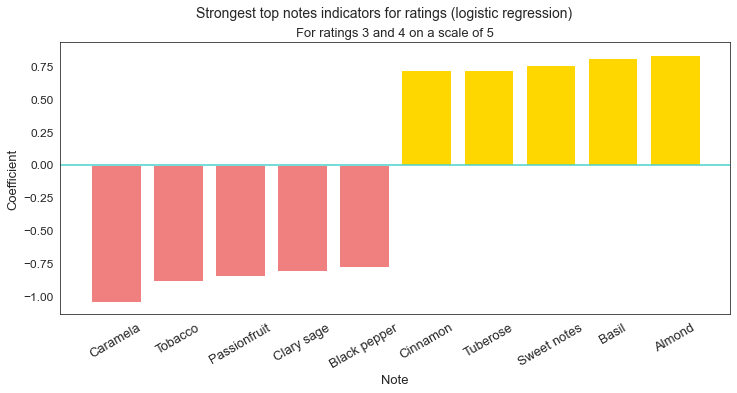

In [82]:
# Create a bar chart of the logistic regression model's coefficients 

fig, ax = plt.subplots(figsize = (12, 5))

ax.bar(logreg_coefs_head_tail.index, logreg_coefs_head_tail['Coefficient'],
       color = logreg_coefs_head_tail['Color'])

plt.xlabel('Note', size = 13)

plt.xticks(rotation = 30, size = 13)

plt.axhline(0, color = 'mediumturquoise')

plt.ylabel('Coefficient', size = 13)

plt.yticks(size = 12)

plt.suptitle('Strongest top notes indicators for ratings (logistic regression)', size = 14)

plt.title('For ratings 3 and 4 on a scale of 5', size = 13)

plt.savefig('../figures/logreg_coefs_head_tail.png')

#### Let's serialize the model to use later (so we don't have to re-fit it after reopening the notebook)

In [344]:
# Save the fitted pipeline / gridsearch as a pickle file

with open('../models/logreg.pkl', 'wb') as pickle_out:
    pickle.dump(logreg, pickle_out)

In [345]:
# Read in the pickle file of the fitted model

with open('../models/logreg.pkl', 'rb') as pickle_in:
    logreg_from_pkl = pickle.load(pickle_in)
    
logreg_from_pkl

LogisticRegression()

In [346]:
preds = logreg_from_pkl.predict(X_test)
len(preds)
preds_df = X_test.copy()
preds_df['Predicted rating'] = preds
preds_df.head()

,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,bbq,beeswax,bitter,cacao,camphor,caramel,caramela,cherry,cinnamon,citrus,clay,coca-cola,coconut,coffee,cognac,conifer,earthy,floral,foresty,fresh,fresh_spicy,fruity,gourmand,green,herbal,honey,industrial_glue,lactonic,leather,marine,martini,...,base_1_patchouli,base_1_pine,base_1_powdery_notes,base_1_praline,base_1_raspberry,base_1_red_cedar,base_1_resin,base_1_rose,base_1_saffron,base_1_sandalwood,base_1_siam_benzoin,base_1_spices,base_1_spicy_notes,base_1_styrax,base_1_sugar,base_1_sumac,base_1_sweet_notes,base_1_tahitian_vanilla,base_1_tobacco,base_1_toffee,base_1_tonka_bean,base_1_tuberose,base_1_turkish_rose,base_1_vanila,base_1_vanilla,base_1_vanille,base_1_vetiver,base_1_virginia_cedar,base_1_virginian_cedar,base_1_watery_notes,base_1_whipped_cream,base_1_white_chocolate,base_1_white_musk,base_1_white_woods,base_1_white_tobacco,base_1_wild_berries,base_1_woodsy_notes,base_1_woody_notes,base_1_oak_moss,base_1_vetyver,base_1_white_honey,Predicted rating
24612,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
26426,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
34663,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
40981,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
17632,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4


# Demo work

### Here let's work through the steps to draw middle and base notes from a random sample of the dataset

In [91]:
# Slice out a single fragrance to work out how to create a feature set from a single input (top note)

tester = fragrance_df_top_mid_base[fragrance_df_top_mid_base['title'] == 'Urban Homme David Beckham for men']

# Filter on non-zero notes (notes that are present)

tester.loc[:, (tester != 0).any(axis = 0)]

,url,title,average_rating_,amber,aromatic,fruity,ozonic,sweet,woody,top_0_mandarin_orange,top_1_green_apple,top_2_thyme,top_3_none,middle_0_none,middle_0_1_none,middle_1_none,middle_0_2_lavender,middle_1_1_none,middle_2_none,base_0_none,base_0_1_none,base_1_none
36014,https://www.fragrantica.com/perfume/David-Beckham/Urban-Homme-17357.html,Urban Homme David Beckham for men,3.26,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Holding `top_0_mandarin_orange` as a constant, let's look at ten random rows to get a sense of how notes are combined in existing fragrances

In [84]:
# Slice on just fragrances with positive class in `top_0_mandarin_orange`

top_0_mandarin_orange_df = (fragrance_df_top_mid_base[fragrance_df_top_mid_base['top_0_mandarin_orange'] == 1]
                                                       .reset_index(drop = True))

printmd(f'**Row count in `top_0_mandarin_orange_df`: {len(top_0_mandarin_orange_df):,}**')

# Set a random seed for reproducibility within the notebook

np.random.seed(42)

# Randomly select row numbers from the dataframe

random_selection = np.random.randint(low = 0,
                                     high = len(top_0_mandarin_orange_df) - 1,
                                     size = 10)

printmd(f'**Randomly selected rows:**')
ipd(random_selection)

# Slice the mandarin orange // slice `top_0_mandarin_orange_df` on just the rows from the set of randomly numbers above

top_0_mandarin_orange_mini_df = top_0_mandarin_orange_df.iloc[[row for row in random_selection]]

# Filter on non-zero notes (notes that are present)

top_0_mandarin_orange_mini_df  = (top_0_mandarin_orange_mini_df
                                      .loc[:, (top_0_mandarin_orange_mini_df != 0).any(axis = 0)])

top_0_mandarin_orange_mini_df  = (top_0_mandarin_orange_mini_df
                                      .loc[:, (top_0_mandarin_orange_mini_df != 'None').any(axis = 0)])

top_0_mandarin_orange_mini_df

**Row count in `top_0_mandarin_orange_df`: 1,747**

**Randomly selected rows:**

array([1126, 1459,  860, 1294, 1130, 1095, 1724, 1044, 1638,  121])

,url,title,average_rating_,amber,balsamic,cacao,citrus,earthy,floral,fresh,fresh_spicy,fruity,herbal,musky,patchouli,powdery,rose,rum,soft_spicy,sweet,tropical,vanilla,warm_spicy,white_floral,woody,ratings_bins,top_0_mandarin_orange,top_1_basil,top_1_bergamot,top_1_dark_chocolate,top_1_grapefruit,top_1_jasmine,top_1_none,top_1_orchid,top_1_pear,top_1_pepper,top_2_gardenia,top_2_lemon_verbena,top_2_lemongrass,top_2_none,top_2_peach,top_2_pink_pepper,top_3_licorice,top_3_none,top_3_sage,top_3_vanilla,middle_0_none,middle_0_orris_root,middle_0_1_cyclamen,middle_0_1_damask_rose,middle_0_1_none,middle_0_1_truffle,middle_0_1_vanilla,middle_1_none,middle_0_2_none,middle_0_2_rose,middle_0_2_wood_resin,middle_1_1_heliotrope,middle_1_1_jasmine,middle_1_1_none,middle_1_1_orchid,middle_1_1_rum,middle_2_none,base_0_musk,base_0_none,base_0_1_none,base_1_guaiac_wood,base_1_none
1126,https://www.fragrantica.com/perfume/Juliana-Paes/A-Tenta-o-41837.html,A Tentação Juliana Paes for women,4.00,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1
1459,https://www.fragrantica.com/perfume/Novaya-Zarya/Iris-32955.html,Iris Novaya Zarya for women,4.50,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0
860,https://www.fragrantica.com/perfume/City/City-Sexy-Sweet-Cats-23382.html,City Sexy Sweet Cats City for women,4.00,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,4,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,1
1294,https://www.fragrantica.com/perfume/Corine-de-Farme/Lilly-20312.html,Lilly Corine de Farme for women,4.33,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,4,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1
1130,https://www.fragrantica.com/perfume/Dzintars/Miss-3-20232.html,Miss 3 Dzintars for women,4.00,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,4,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1
1095,https://www.fragrantica.com/perfume/Montblanc/Pr-sence-d-une-femme-831.html,Présence d'une femme Montblanc for women,3.91,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,1
1724,https://www.fragrantica.com/perfume/Yves-Rocher/Mon-Evidence-50775.html,Mon Evidence Yves Rocher for women,3.88,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,1,0,1
1044,https://www.fragrantica.com/perfume/Caron/Eau-de-Reglisse-Liquorice--7422.html,Eau de Reglisse (Liquorice) Caron for women and men,3.95,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1
1638,https://www.fragrantica.com/perfume/Sarah-Kern/La-Panthere-26277.html,La Panthere Sarah Kern for women,1.00,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1
121,https://www.fragrantica.com/perfume/Adam-Levine/Adam-Levine-for-Men-17489.html,Adam Levine for Men Adam Levine for men,3.20,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1


#### Just looking at this random set of 10 fragrances, here's a look at the inferences we can make:
#### Holding `top_0_mandarin_orange` as a constant, these features have the strongest correlation to our target, `ratings_bins`

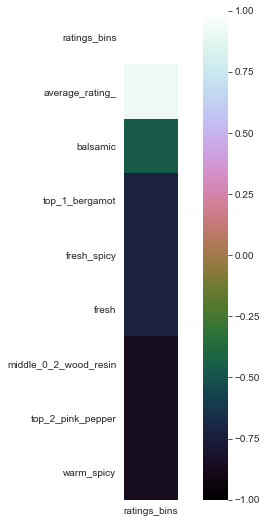

In [621]:
# Get correlation of variables
top_0_mandarin_orange_corr = top_0_mandarin_orange_mini_df.corr()[['ratings_bins']]

# Set a correlation threshold (either positive or negative) to focus on significant features
top_0_mandarin_orange_corr_significant = top_0_mandarin_orange_corr[['ratings_bins']][(top_0_mandarin_orange_corr['ratings_bins'] > 0.45) | (top_0_mandarin_orange_corr['ratings_bins'] < -0.45)]

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(top_0_mandarin_orange_corr_significant)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
plt.subplots(figsize = (9, 9))
sns.heatmap(top_0_mandarin_orange_corr_significant.sort_values(by = 'ratings_bins')[::-1],
            mask = mask, square = True,
            cmap = 'cubehelix', annot = False, 
            vmin = -1, vmax = 1);


# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html and GA instructors

### For the demo, let's create a set of top, middle and base notes so we can then "make a perfume".

### These notes correspond to the presence of the `top_0_mandarin_orange` feature

In [356]:
top_0_mandarin_orange_mini_df.columns

top_0_mandarin_orange_mini_top = ([col for col in top_0_mandarin_orange_mini_df.columns if ('top' in col)
                                                                                          & ('none' not in col)])

top_0_mandarin_orange_mini_middle = ([col for col in top_0_mandarin_orange_mini_df.columns if ('middle' in col)
                                                                                          & ('none' not in col)])

top_0_mandarin_orange_mini_base = ([col for col in top_0_mandarin_orange_mini_df.columns if ('base' in col)
                                                                                          & ('none' not in col)])
ipd(np.array(top_0_mandarin_orange_mini_top))
ipd(np.array(top_0_mandarin_orange_mini_middle))
ipd(np.array(top_0_mandarin_orange_mini_base))

array(['top_0_mandarin_orange', 'top_1_basil', 'top_1_bergamot',
       'top_1_dark_chocolate', 'top_1_grapefruit', 'top_1_jasmine',
       'top_1_orchid', 'top_1_pear', 'top_1_pepper', 'top_2_gardenia',
       'top_2_lemon_verbena', 'top_2_lemongrass', 'top_2_peach',
       'top_2_pink_pepper', 'top_3_licorice', 'top_3_sage',
       'top_3_vanilla'], dtype='<U21')

array(['middle_0_orris_root', 'middle_0_1_cyclamen',
       'middle_0_1_damask_rose', 'middle_0_1_truffle',
       'middle_0_1_vanilla', 'middle_0_2_rose', 'middle_0_2_wood_resin',
       'middle_1_1_heliotrope', 'middle_1_1_jasmine', 'middle_1_1_orchid',
       'middle_1_1_rum'], dtype='<U22')

array(['base_0_musk', 'base_1_guaiac_wood'], dtype='<U18')

In [302]:
# Set seed for reproducibility

np.random.seed(42)

# Select a middle and base note randomly

middle_random = np.random.choice(top_0_mandarin_orange_mini_middle)

base_random = np.random.choice(top_0_mandarin_orange_mini_base)

ipd(middle_random)

ipd(base_random)

'middle_0_2_wood_resin'

'base_1_guaiac_wood'

In [459]:
def make_a_fragrance(top):
    
   # Grab all columns in X feature space
    all_X_cols = [col for col in X.columns]
    
    # Create a dataframe with the same features as X, set all values to zero
    notes_df = pd.DataFrame(columns = all_X_cols)
    notes_df = notes_df.append([0]).fillna(0).drop(columns = 0)
    
    # Set seed for reproducibility
    
    np.random.seed(42)
    
    top = top
    
    # Randomly select values for middle and base notes
    
    middle = np.random.choice(top_0_mandarin_orange_mini_middle)
    
    base = np.random.choice(top_0_mandarin_orange_mini_base)

    print(middle, base)
    
    notes_df[top] = 1
    notes_df[middle] = 1
    notes_df[base] = 1
    
    return notes_df

make_a_fragrance('top_0_mandarin_orange')

middle_0_2_wood_resin base_1_guaiac_wood


,alcohol,aldehydic,almond,amber,animalic,anis,aquatic,aromatic,asphault,bacon,balsamic,base_0_1_agarwood_(oud),base_0_1_akigalawood,base_0_1_almond,base_0_1_almond_blossom,base_0_1_almond_wood,base_0_1_amber,base_0_1_amber_from_tunis,base_0_1_ambergris,base_0_1_amberwood,base_0_1_ambrette_(musk_mallow),base_0_1_ambroxan,base_0_1_amyris,base_0_1_angelica,base_0_1_atlas_cedar,base_0_1_australian_sandalwood,base_0_1_balsam_fir,base_0_1_balsamic_vinegar,base_0_1_bamboo,base_0_1_benzoin,base_0_1_bergamot,base_0_1_birch,base_0_1_black_amber,base_0_1_black_cardamom,base_0_1_black_currant,base_0_1_black_tea,base_0_1_black_vanilla_husk,base_0_1_boletus_edulis,base_0_1_bourbon_vanilla,base_0_1_brazilian_rosewood,base_0_1_breu-branco,base_0_1_brown_sugar,...,top_3_white_rose,top_3_white_rum,top_3_white_sandalwood,top_3_white_suede,top_3_white_tea,top_3_white_tobacco,top_3_white_wine,top_3_white_woods,top_3_wild_berries,top_3_wild_rose,top_3_wild_strawberry,top_3_wild_strawberry_leaf,top_3_wildflowers,top_3_wisteria,top_3_wolfberry,top_3_wood_resin,top_3_woodsy_notes,top_3_woody_notes,top_3_wool,top_3_wormwood,top_3_yellow_freesia,top_3_yellow_mandarin,top_3_yellow_narcissus,top_3_yellow_plum,top_3_ylang-ylang,top_3_yuzu,tropical,tuberose,unknown,vanilla,vinyl,violet,vodka,warm_spicy,watery,wet_plaster,whiskey,white_floral,white_wine,wine,woody,yellow_floral
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Make a prediction from our synthetic data

In [351]:
mini_preds = logreg_from_pkl.predict(make_a_fragrance('top_0_mandarin_orange'))

ipd(len(mini_preds))

mini_preds

True True True


1

array([4], dtype=int64)

### Create a mini dataframe for the demo

- [x] Manually select top notes. This feature space will be reduced when the user selects a single note (by selecting a radio button) on the web app
- [x] Of the positive classes for each of the top notes from above, randomly select 10 rows from the full dataframe. The dataframe is super small for computational / web hosting reasons
- [x] Randomly select the middle and base notes from these rows

In [465]:
# Select random top notes as a feature space (to then be pared down with a single selection) for the demo
# I handpicked these because I think at least some of them would appeal to different segments of the population

top_notes_demo = ['top_0_amalfi_lemon',  'top_0_pink_grapefruit', 'top_1_watermelon',
                  'top_1_mint', 'top_1_earl_grey_tea', 'top_1_champagne', 'top_1_creme_brulee',
                  'top_1_pepper', 'top_1_nutmeg', 'top_1_teak_wood', 'top_1_pine_needles', 'top_1_mountain_air']

items = []
for item in top_notes_demo:
    items.append(item[len('top_0_'):].replace('_', ' ').capitalize())      # Sanitize names so they're presentable
#     items.append(item[len('top_0_'):])                                   # Sanitize names so they're searchable

top_notes_demo_sanitized = items

ipd(np.array(top_notes_demo))
np.array(top_notes_demo_sanitized)

top_notes_demo_dict = {}

for orig, sanitized in zip(top_notes_demo, top_notes_demo_sanitized):
#     print(orig, sanitized)
    top_notes_demo_dict[orig] = sanitized
top_notes_demo_dict
# for col in fragrance_df_top_mid_base_3_4_rating.columns :
#     print(col)

array(['top_0_amalfi_lemon', 'top_0_pink_grapefruit', 'top_1_watermelon',
       'top_1_mint', 'top_1_earl_grey_tea', 'top_1_champagne',
       'top_1_creme_brulee', 'top_1_pepper', 'top_1_nutmeg',
       'top_1_teak_wood', 'top_1_pine_needles', 'top_1_mountain_air'],
      dtype='<U21')

{'top_0_amalfi_lemon': 'Amalfi lemon',
 'top_0_pink_grapefruit': 'Pink grapefruit',
 'top_1_watermelon': 'Watermelon',
 'top_1_mint': 'Mint',
 'top_1_earl_grey_tea': 'Earl grey tea',
 'top_1_champagne': 'Champagne',
 'top_1_creme_brulee': 'Creme brulee',
 'top_1_pepper': 'Pepper',
 'top_1_nutmeg': 'Nutmeg',
 'top_1_teak_wood': 'Teak wood',
 'top_1_pine_needles': 'Pine needles',
 'top_1_mountain_air': 'Mountain air'}

In [89]:
# Create a mini dataframe for the demo

def get_slices(top_note_user_selected):

    top_note_user_selected_df = pd.DataFrame()
    
    # Slice on just fragrances with positive class in the selected topnote
    
    top_note_user_selected_df = (fragrance_df_top_mid_base[fragrance_df_top_mid_base[top_note_user_selected] != 0] 
                                                       .reset_index(drop = True))
    return top_note_user_selected_df

def get_demo_mini_df(var_name):
    
    var_name = get_slices(var_name)

    return var_name

# Make the demo_df by concatenating  
demo_df = pd.concat([get_demo_mini_df('top_0_amalfi_lemon'), get_demo_mini_df('top_0_pink_grapefruit'),
                     get_demo_mini_df('top_1_watermelon'), get_demo_mini_df('top_1_mint'),
                     get_demo_mini_df('top_1_earl_grey_tea'), get_demo_mini_df('top_1_champagne'), 
                     get_demo_mini_df('top_1_creme_brulee'), get_demo_mini_df('top_1_pepper'), 
                     get_demo_mini_df('top_1_nutmeg'), get_demo_mini_df('top_1_teak_wood'), 
                     get_demo_mini_df('top_1_pine_needles'), get_demo_mini_df('top_1_mountain_air')])
# Drop duplicates
demo_df = demo_df.drop_duplicates()

printmd(f'**Row count in `demo_df`: {len(demo_df):,}**')
    
# Set seed for reproducibility

np.random.seed(42)

# Randomly select row numbers from the dataframe

random_selection = np.random.randint(low = 0,
                                     high = len(demo_df) - 1,
                                     size = 10)

printmd(f'**Randomly selected rows:**')
ipd(random_selection)

# Slice `demo_df` on just the rows from the set of randomly numbers above

demo_df = demo_df.iloc[[row for row in random_selection]]

# Filter on non-zero notes (notes that are present)

demo_df  = (demo_df.loc[:, (demo_df != 0).any(axis = 0)])

demo_df  = (demo_df.loc[:, (demo_df != 'None').any(axis = 0)])

printmd(f'**New shape of `demo_df`: {demo_df.shape}**')

ipd(demo_df.head(3))

# Export for use in demo
demo_df.to_csv('../data/data_subsets/demo/demo_df.csv', index = False)

**Row count in `demo_df`: 1,310**

**Randomly selected rows:**

array([1126,  860, 1294, 1130, 1095, 1044,  121,  466, 1238,  330])

**New shape of `demo_df`: (10, 69)**

,url,title,average_rating_,amber,aromatic,balsamic,citrus,earthy,floral,fresh,fresh_spicy,fruity,green,musky,rose,smoky,soft_spicy,sweet,vanilla,warm_spicy,white_floral,woody,ratings_bins,top_0_amalfi_lemon,top_0_bergamot,top_0_citruses,top_0_clementine,top_0_labdanum,top_0_leather,top_0_patchouli,top_0_pink_grapefruit,top_0_saffron,top_1_calabrian_mandarin,top_1_mint,top_1_nutmeg,top_1_orange,top_1_pepper,top_1_teak_wood,top_2_black_currant,top_2_cappuccino,top_2_cypress,top_2_fig,top_2_grapefruit,top_2_none,top_2_pepper,top_2_saffron,top_3_cactus_flower,top_3_none,top_3_spices,top_3_spicy_notes,top_3_vetiver,top_3_oak_moss,middle_0_none,middle_0_1_ginger,middle_0_1_jasmine,middle_0_1_none,middle_0_1_rose,middle_1_none,middle_0_2_none,middle_0_2_orange_blossom,middle_0_2_palisander_rosewood,middle_1_1_geranium,middle_1_1_none,middle_1_1_saffron,middle_1_1_spicy_notes,middle_2_none,base_0_none,base_0_1_none,base_1_none
29,https://www.fragrantica.com/perfume/Goti/Alchemico-Visione-2-Fuoco-45887.html,Alchemico Visione 2 Fuoco Goti for women and men,5.00,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1
2,https://www.fragrantica.com/perfume/The-Merchant-of-Venice/Rose-Cloud-43593.html,Rose Cloud The Merchant of Venice for women and men,5.00,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,1
6,https://www.fragrantica.com/perfume/Yosh/Sombre-Negra-11034.html,Sombre Negra Yosh for women and men,4.29,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1
